In [1]:
# read the data and set the datetime as the index
%matplotlib inline
import pandas as pd

path= '../data/'
url = path + 'bikeshare.csv'  #path + 'bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [2]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [4]:
bikes.index


DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name=u'datetime', length=10886, freq=None)

In [7]:
bikes.rename(columns={'count' : 'total'}, inplace=True)
bikes.columns

Index([u'season', u'holiday', u'workingday', u'weather', u'temp', u'atemp',
       u'humidity', u'windspeed', u'casual', u'registered', u'total'],
      dtype='object')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [9]:
len(bikes)

10886

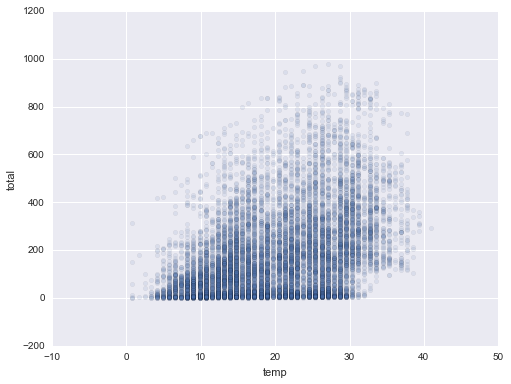

In [11]:
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.1)

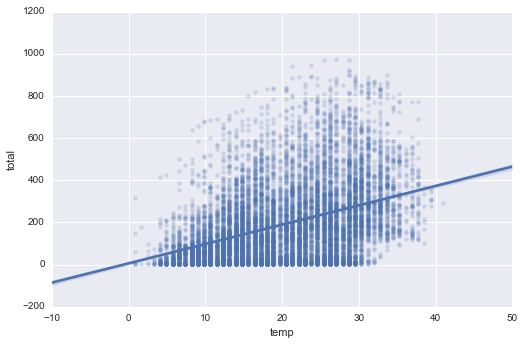

In [13]:
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [14]:
# create x and y
feature_cols = ['temp']
x = bikes[feature_cols]
y = bikes.total
x.shape

(10886, 1)

In [15]:
y.shape


(10886,)

In [16]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#print the coefficients, the answer seems wrong for me everytime. I thought the 6 was suppose to be one
print linreg.intercept_
print linreg.coef_

6.04621295962
[ 9.17054048]


## Using the model for prediction

How many bike rentals would we predict if the temperature was 21 degrees celsius?

In [19]:
#manually calculate the prediction
linreg.intercept_ + linreg.coef_*21

array([ 198.62756307])

In [20]:
# use the predict method
linreg.predict(21)

array([ 198.62756307])

## Does the scale of the features matter?
Let's say that temperature was measured in Fahrenheit, rather than Celsius. How woiuld that affect teh model?

In [21]:
# create a new column for Fahrenheit temperature
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,49.712


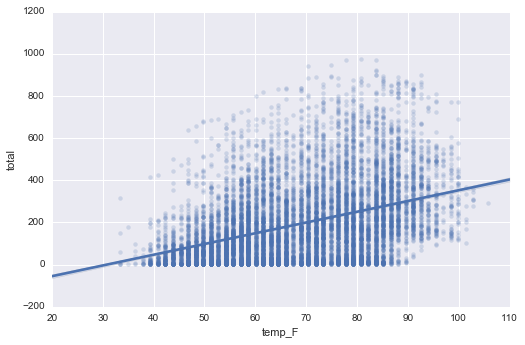

In [22]:
# Seasborn scatter plot with regression line
sns.lmplot(x='temp_F', y ='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [23]:
# create x and y
feature_cols = ['temp_F']
x = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(x,y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

-156.985617821
[ 5.09474471]


In [24]:
# convert 21 degrees Celsius to Fahrenheit
21 * 1.8 + 32

69.80000000000001

In [25]:
# predict rentals for this degrees fahrenheit
linreg.predict(69.80000000000001)

array([ 198.62756307])

**Concludsion:** The scale of the features is **irrelevant** for linear regression models. When changing the scale, we simply change our **interpretation** of the coefficients.

In [27]:
# remove the temp_F column
bikes.drop('temp_F', axis=1, inplace=True)

In [28]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


## Visualizing the data (part 2)

In [29]:
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

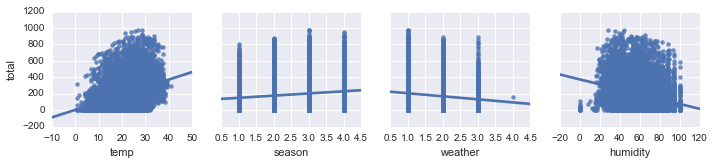

In [30]:
# multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg')

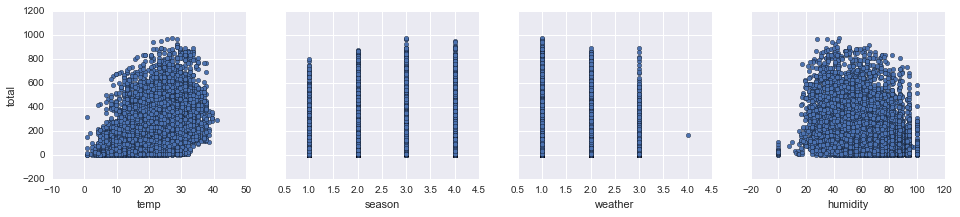

In [31]:
# multiple scatter plots in matplotlib
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

In [32]:
# cross-tabulation of season and month
pd.crosstab(bikes.season, bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


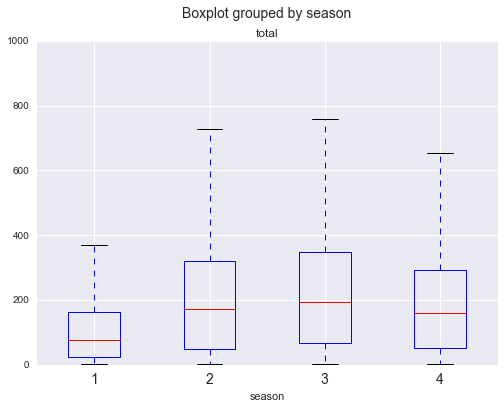

In [34]:
# box plot of rentals, grouped by season
bikes.boxplot(column='total', by='season')

Notably:
 * A line can't capture a non-linear relationship.
 * There are more rentals in winter than in spring?

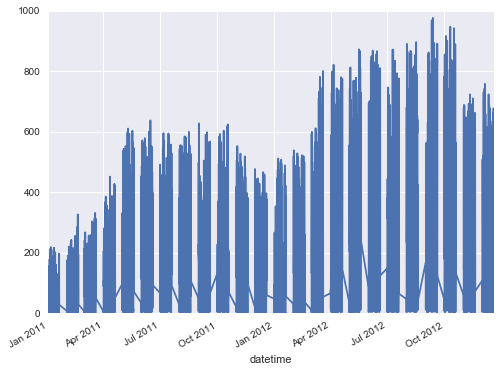

In [35]:
# line plot of rentals
bikes.total.plot()

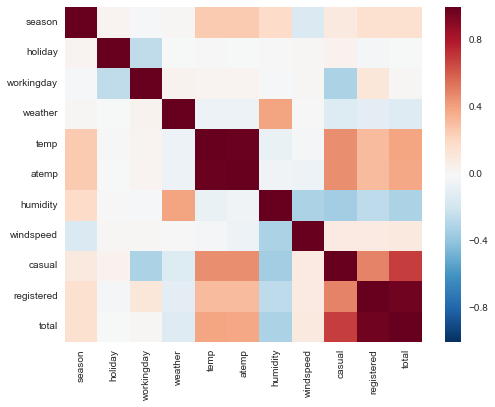

In [36]:
#visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(bikes.corr())

## Adding more features to the model


In [37]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [39]:
# create x and y
x = bikes[feature_cols]
y = bikes.total

#instantiate and fit
linreg = LinearRegression()
linreg.fit(x,y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

159.520687861
[  7.86482499  22.53875753   6.67030204  -3.11887338]


In [40]:
# pair the features names with the coefficients
zip(feature_cols, linreg.coef_)

[('temp', 7.8648249924774394),
 ('season', 22.538757532466761),
 ('weather', 6.6703020359237186),
 ('humidity', -3.1188733823965009)]

Interpreting the coefficiants:
* Holding all other features fixed, a 1 unit increase in temperature is associated with the rental increase of 7.86 bikes
* Holding all other features fixed, a 1 unit increase in season is associated with a rental increase of 22.5 bikes
* Holding all other features fixed, a 1 unit increase in weather is associated with a rental increase of 6.67 bikes.
* Holding all other features fixed, a 1 unti increase in humididty is associated with a rental decrease of 3.12 bikes.

## Feature Selection

How do we choose which features to include in the model? We're going to use train/test split (and eventually cross-validation).


In [41]:
# example true and predicted response values
# MAE Mean Absolute Error subtract the true from the pred, remove the negative sign, then get the mean
# MSE Mean square Error get the individual differences, square them, add them and get the mean
# RMSE Root mean Squared Error square root of the MSE
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [43]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(true, pred)
print 'MSE:', metrics.mean_squared_error(true, pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(true, pred))

 MAE: 2.0
MSE: 7.5
RMSE: 2.73861278753


Comparing these metrics:
* ** MAE** is the easiest to understand, because it's the average error.
* ** MSE** is more popular than MAE, because MSE "punishes" larger error, which tends to be useful in the real world.
* **RMSE** is even more popular than MSE, becauSe RMSE is interpretable in the "y" units. 

All of these are the **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors: 

In [45]:
# same true values as above
true = [10, 7, 5, 5]

# new set of predicted values
pred = [10, 7, 5, 13]

# MAE is the same as before
print 'MAE:', metrics.mean_absolute_error(true, pred)
    
# MSE and RMSE are larger than before
print 'MSE:', metrics.mean_squared_error(true, pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(true, pred))

MAE: 2.0
MSE: 16.0
RMSE: 4.0


## Comparing models wiht train/test split and RMSE

In [48]:
from sklearn.cross_validation import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    x = bikes[feature_cols]
    y = bikes.total
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))


In [49]:
# compare different sets of features
print train_test_rmse(['temp', 'season', 'weather', 'humidity'])
print train_test_rmse(['temp', 'season', 'weather'])
print train_test_rmse(['temp', 'season', 'humidity'])

155.649459131
164.165399763
155.598189367
